In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import MemorySaver

In [10]:
load_dotenv()

True

In [11]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [12]:
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash')


def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [13]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpointer)

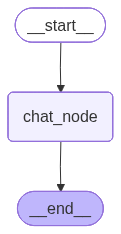

In [14]:
chatbot

In [ ]:
# initial_state = {
#     'messages': [HumanMessage(content='What is the capital of india')]
# }

# chatbot.invoke(initial_state)['messages'][-1].content

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [17]:
thread_id = '1'

while True:
    user_message = input('Type here: ')
    print('User:', user_message)
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    config = {'configurable': {'thread_id': thread_id}}
    response = chatbot.invoke({'messages': [HumanMessage(user_message)]}, config=config)
    print('AI: ', response['messages'][-1].content)

User: hi
AI:  Hi there! How can I help you today?
User: my name is Prabhat
AI:  Nice to meet you, Prabhat! How can I help you today?
User: what is my name 
AI:  Your name is Prabhat. You just told me! 😊
User: ok then tell me what will be the sum of 10 and 2
AI:  The sum of 10 and 2 is 12.
User: then add 5 more
AI:  Okay! So, 12 + 5 = 17.

The sum is 17.
User: that great
AI:  Great! Is there anything else I can help you with today, Prabhat?
User: no
AI:  Alright! Have a great day, Prabhat!
User: ok bye
AI:  Bye! You too!
User: bye


In [18]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='0c51d9b5-5097-4407-92ff-efa2c9464099'), AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--8b334613-ec39-4f21-9a2b-f409e7326c8d-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='my name is Prabhat', additional_kwargs={}, response_metadata={}, id='a1b96be3-376d-4dcf-aaad-b3d7371ad746'), AIMessage(content='Nice to meet you, Prabhat! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--b0dd5aff-a774-4bc7-a1e7-ab971f8bed8d-0', usage_metadata={'input_tokens': 16, 'output_tokens': 16, 'total_to